In [37]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:
#To read and understand the data
ad=pd.read_csv('sales_advertising.csv')
ad

,No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [82]:
type(ad)

pandas.core.frame.DataFrame

In [42]:
ad.head()

,No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [83]:
ad.tail()

,No.,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [86]:
#to see random rows
ad.sample(4)

,No.,TV,radio,newspaper,sales
145,146,140.3,1.9,9.0,10.3
71,72,109.8,14.3,31.7,12.4
26,27,142.9,29.3,12.6,15.0
174,175,222.4,3.4,13.1,11.5


# Data Inspection

In [43]:
ad.describe()

,No.,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [45]:
ad.shape

(200, 5)

In [46]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No.        200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Data cleaning

In [49]:
# Checking Null values
ad.isnull().sum()*100/ad.shape[0]
# There are no NULL values in the dataset, hence it is clean.

No.          0.0
TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

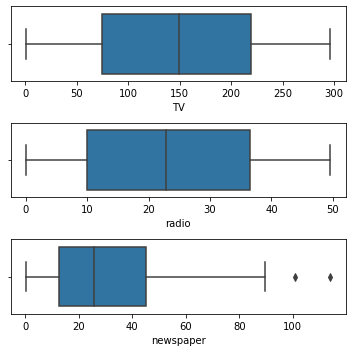

In [51]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad['TV'], ax = axs[0])
plt2 = sns.boxplot(ad['radio'], ax = axs[1])
plt3 = sns.boxplot(ad['newspaper'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

# Exploratory Data Analysis
Univariate Analysis

In [ ]:
#sales (Target Variable)

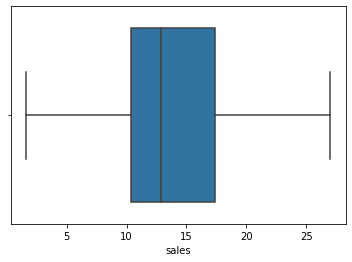

In [52]:
sns.boxplot(ad['sales'])
plt.show()

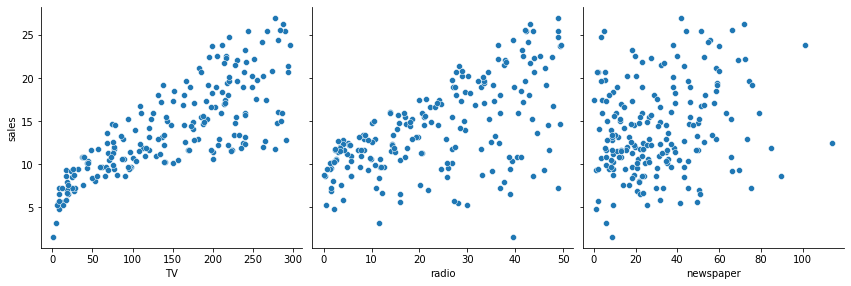

In [54]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(ad, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

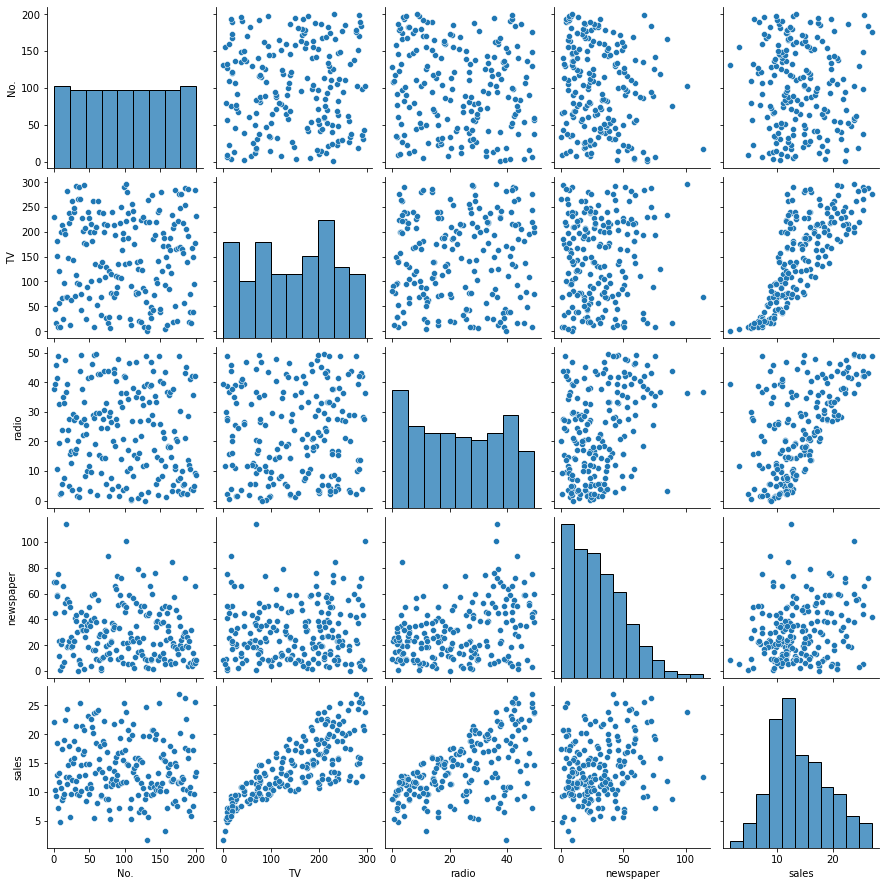

In [88]:
sns.pairplot(ad)
plt.savefig('prirplot.png')
plt.show()

In [89]:
#correlation
ad.corr()

,No.,TV,radio,newspaper,sales
No.,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [90]:
ad.corr()['sales'].sort_values()

No.         -0.051616
newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

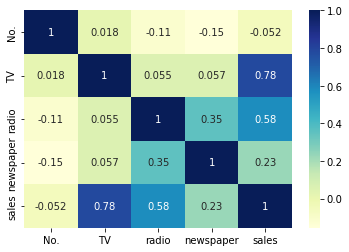

In [60]:
# Let's see the correlation between different variables.
sns.heatmap(ad.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sale and least with.newspaper.

In [95]:
ad.skew()

No.          0.000000
TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

TV has less skewness

In [92]:
from scipy.stats import zscore

In [101]:
z=np.abs(zscore(ad))

In [102]:
z

,No.,TV,radio,newspaper,sales
0,1.723412,0.969852,0.981522,1.778945,1.552053
1,1.706091,1.197376,1.082808,0.669579,0.696046
2,1.688771,1.516155,1.528463,1.783549,0.907406
3,1.671450,0.052050,1.217855,1.286405,0.860330
4,1.654129,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...,...
195,1.654129,1.270941,1.321031,0.771217,1.234053
196,1.671450,0.617035,1.240003,1.033598,0.830548
197,1.688771,0.349810,0.942899,1.111852,0.234898
198,1.706091,1.594565,1.265121,1.640850,2.205347


In [100]:
import numpy as np
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

# Model Building
Performing Simple Linear Regression

In [62]:
#To split the data we first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y
X = ad['TV']
y = ad['sales']

In [103]:
#Train-test split - keep 70% of the data in train dataset and the rest 30% in test dataset,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [64]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [65]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: sales, dtype: float64

Building a Linear Model

In [66]:
import statsmodels.api as sm

In [67]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [68]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [69]:
# Performing a summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.84e-30
Time:                        16:28:24   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

1. The coefficient for TV is 0.0465, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.613
Meaning that 61.3% of the variance in Sales is explained by TV.This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

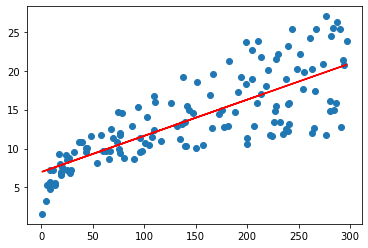

In [71]:
#The fit is significant. Let's visualize how well the model fit the data.From the parameters that we get
#our linear regression equation becomes: Sales=6.9897+0.0465×TV

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9897 + 0.0465*X_train, 'r')
plt.show()

# Model Evaluation
Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

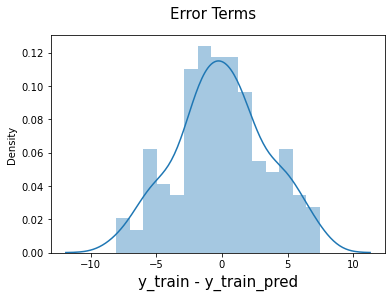

In [73]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

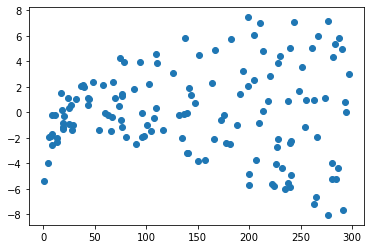

In [75]:
#Looking for patterns in the residuals
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

In [76]:
#Predictions on the Test Set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [77]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327016

In [80]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

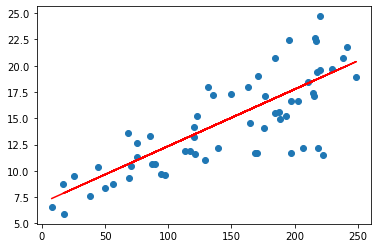

In [81]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()